In [1]:
# 0. Imports & Setup
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('../src')
from functions import ModelTrainer

In [2]:
# 1. Load cleaned & scaled datasets
dev = pd.read_csv('../data/development_final_data.csv')
eval = pd.read_csv('../data/evaluation_final_data.csv')

# 1.1 Split into X and y
X_dev = dev.drop(columns='BMI').values
y_dev = dev['BMI'].values

X_eval = eval.drop(columns='BMI').values
y_eval = eval['BMI'].values

# 1.2 Instantiate the trainer
trainer = ModelTrainer(X_dev, y_dev, X_eval, y_eval)

In [3]:
# 2. Train and evaluate baseline models
baseline_reuslts = trainer.train_and_evaluate_baseline_models()




ElasticNet baseline CV RMSE: 4.0421

Training ElasticNet on all features...
Model saved to ../models/ElasticNet_baseline.joblib
Evaluating ElasticNet on evaluation set...
--- ElasticNet Evaluation Summary ---
RMSE:  mean = 3.8362, median = 3.8271, 95% CI = (3.2491, 4.5229)
MAE:   mean = 2.7453, median = 2.7421, 95% CI = (2.391, 3.1104)
R²:    mean = 0.0541, median = 0.054, 95% CI = (0.0189, 0.0884)
SVR baseline CV RMSE: 3.9516

Training SVR on all features...
Model saved to ../models/SVR_baseline.joblib
Evaluating SVR on evaluation set...
--- SVR Evaluation Summary ---
RMSE:  mean = 3.7008, median = 3.6998, 95% CI = (3.0812, 4.4179)
MAE:   mean = 2.3876, median = 2.3861, 95% CI = (2.0264, 2.758)
R²:    mean = 0.1206, median = 0.1205, 95% CI = (0.0525, 0.1928)
BayesianRidge baseline CV RMSE: 3.9701

Training BayesianRidge on all features...
Model saved to ../models/BayesianRidge_baseline.joblib
Evaluating BayesianRidge on evaluation set...
--- BayesianRidge Evaluation Summary ---
RMSE: 

In [4]:
# 3. Feature Selection

X_dev_selected, selected_features_idx = trainer.select_features_with_lasso()




Selected 14 features out of 56


In [10]:
# 3.3 features' name selected by Lasso

feature_names = pd.read_csv('../data/development_final_data.csv').drop(columns='BMI').columns

selected_feature_names = feature_names[trainer.selected_features_idx]

print("\nSelected features by Lasso:")
for i, name in enumerate(selected_feature_names, 1):
    print(f"{i}. {name}")


Selected features by Lasso:
1. Sex
2. Host age
3. Alistipes putredinis
4. Anaerotruncus colihominis
5. Bacteroides massiliensis
6. Bacteroides salyersiae
7. Barnesiella viscericola
8. Parabacteroides goldsteinii
9. Parabacteroides johnsonii
10. Ruminiclostridium thermocellum
11. Ruminococcus champanellensis
12. Ruminococcus flavefaciens
13. Sporobacter termitidis
14. Clostridium symbiosum


In [5]:
# 3.9 train and evaluate FS MODELS (NO TUNING)

fs_eval_results = trainer.train_and_evaluate_fs_models()



Training ElasticNet on selected features...
Model saved to ../models/ElasticNet_FS.joblib
Evaluating ElasticNet FS model on evaluation set...
--- ElasticNet (FS) Evaluation Summary ---
RMSE:  mean = 3.8362, median = 3.8271, 95% CI = (3.2491, 4.5229)
MAE:   mean = 2.7453, median = 2.7421, 95% CI = (2.391, 3.1104)
R²:    mean = 0.0541, median = 0.054, 95% CI = (0.0189, 0.0884)

Training SVR on selected features...
Model saved to ../models/SVR_FS.joblib
Evaluating SVR FS model on evaluation set...
--- SVR (FS) Evaluation Summary ---
RMSE:  mean = 3.6703, median = 3.6575, 95% CI = (3.0456, 4.3619)
MAE:   mean = 2.3825, median = 2.3794, 95% CI = (2.027, 2.7311)
R²:    mean = 0.1339, median = 0.135, 95% CI = (0.0476, 0.2149)

Training BayesianRidge on selected features...
Model saved to ../models/BayesianRidge_FS.joblib
Evaluating BayesianRidge FS model on evaluation set...
--- BayesianRidge (FS) Evaluation Summary ---
RMSE:  mean = 3.5985, median = 3.5905, 95% CI = (3.058, 4.2397)
MAE:   m

In [6]:
# 4. Hyperparameter Tuning; train and evaluate
param_grids = {
    'ElasticNet': {
        'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    },
    'SVR': {
        'C': [0.01, 0.1, 1, 10, 100],
        'epsilon': [0.001, 0.01, 0.1, 0.5, 1.0],
        'kernel': ['rbf']
    },
    'BayesianRidge': {
        'alpha_1': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3],
        'lambda_1': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
    }
}

tuned_results = trainer.train_and_evaluate_tuned_models(param_grids)



Tuning ElasticNet...
Model saved to ../models/ElasticNet_FS_TUNED.joblib
Evaluating tuned ElasticNet model on evaluation set...
--- ElasticNet (FS + Tuning) Evaluation Summary ---
RMSE:  mean = 3.5978, median = 3.5918, 95% CI = (3.0629, 4.2316)
MAE:   mean = 2.5226, median = 2.5135, 95% CI = (2.193, 2.8735)
R²:    mean = 0.1659, median = 0.1651, 95% CI = (0.0495, 0.274)

Tuning SVR...
Model saved to ../models/SVR_FS_TUNED.joblib
Evaluating tuned SVR model on evaluation set...
--- SVR (FS + Tuning) Evaluation Summary ---
RMSE:  mean = 3.652, median = 3.6406, 95% CI = (3.0406, 4.329)
MAE:   mean = 2.402, median = 2.3992, 95% CI = (2.0491, 2.7558)
R²:    mean = 0.1423, median = 0.143, 95% CI = (0.0597, 0.2217)

Tuning BayesianRidge...
Model saved to ../models/BayesianRidge_FS_TUNED.joblib
Evaluating tuned BayesianRidge model on evaluation set...
--- BayesianRidge (FS + Tuning) Evaluation Summary ---
RMSE:  mean = 3.5985, median = 3.5905, 95% CI = (3.058, 4.2397)
MAE:   mean = 2.5124, med

Saved evaluation results to ../eval_results/all_eval_results.pkl


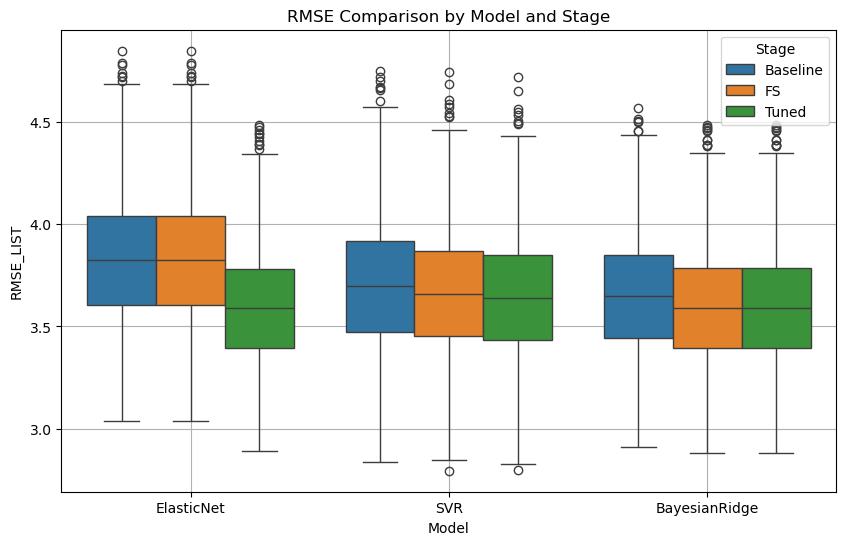

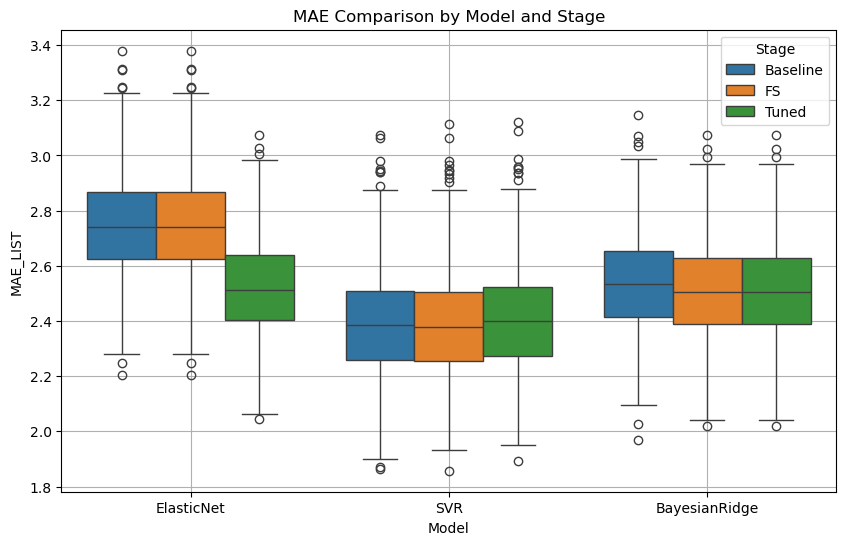

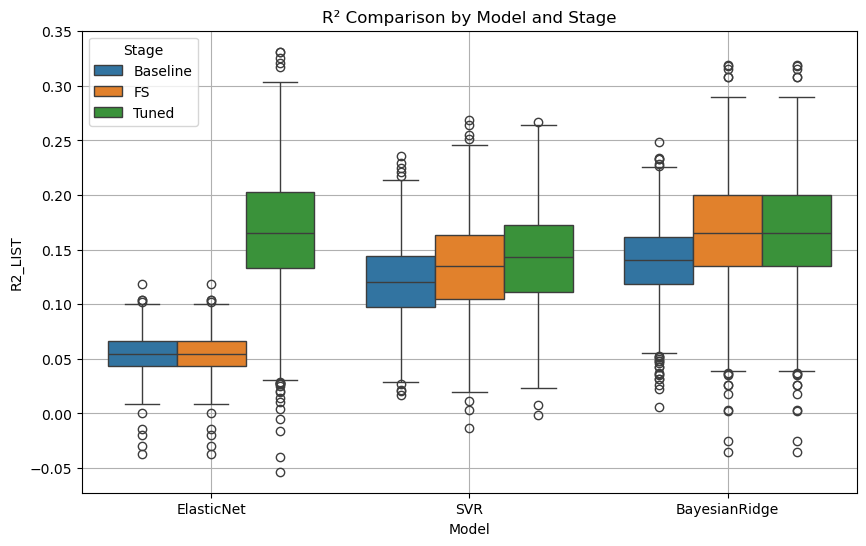

In [7]:
# 5. Compare model stages (Baseline, FS, Tuned) and plot results
final_results = trainer.compare_model_stages()

# Plot boxplots for each metric
trainer.plot_metric_boxplots('rmse_list', final_results, 'RMSE')
trainer.plot_metric_boxplots('mae_list', final_results, 'MAE')
trainer.plot_metric_boxplots('r2_list', final_results, 'R²')


In [8]:
# 6. Identify best model based on RMSE
best_model_name = trainer.get_best_model_by_rmse()


ElasticNet: RMSE = 3.5978
SVR: RMSE = 3.6520
BayesianRidge: RMSE = 3.5985

Best overall model based on evaluation RMSE: ElasticNet

Best model hyperparameters:
{
    "alpha": 0.1,
    "copy_X": true,
    "fit_intercept": true,
    "l1_ratio": 0.1,
    "max_iter": 1000,
    "positive": false,
    "precompute": false,
    "random_state": null,
    "selection": "cyclic",
    "tol": 0.0001,
    "warm_start": false
}


In [9]:
# 7. Train and save the final winner model
trainer.train_and_save_winner_model(best_model_name)


Model saved to ../final_models/winner.joblib
Winner model ('ElasticNet') trained on full dataset and saved with preprocessing included.
